In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp 

from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, recall_score, f1_score
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import timeit
from warnings import filterwarnings
filterwarnings('ignore')

### **Data Importing**

In [ ]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Veri-Bilimi-Bootcamp/Odevler/HW_Data_Set.xlsx")
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


# **1. Data Exploration**

### **1.1. Describe Dataset**

In [ ]:
data.shape

(6167, 136)

In [ ]:
describe(data)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,11.772164,11.756105,-0.268040,-0.723528,-0.444300,-25.970975,24.945192,0.002215,-0.002264,-0.000024,1.048592,0.913289,1.596028,1.102192,-0.276875,-3.087097,-5.202559,-6.191402,-8.376898,-12.298849,-0.142528,3.493271,-1.071197,0.041349,0.099724,0.198962,0.296579,0.342792,0.377493,0.460353,...,-0.000032,-0.422692,95.137008,1.152460,-0.674508,80.624985,0.980187,68.391460,-0.000074,24.704677,-0.167167,15.757278,-0.000022,0.127180,-0.014782,-0.000006,-0.006399,1.210483,-0.000001,0.259444,0.145690,-49.281281,0.508078,-0.011978,-0.000038,0.000004,-0.000004,0.985568,0.099238,0.239987,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,4.488712,2.707619,8.923976,19.028597,11.028702,27.775290,24.669109,0.001415,0.001340,0.000615,66.642196,94.129876,107.442006,113.192879,117.337570,122.636373,123.710650,121.221664,118.771328,118.717178,32.933895,0.765103,20.824311,6.258027,9.216991,12.078004,14.736603,17.107677,21.239270,24.943979,...,0.000068,0.439721,18.305353,0.222516,0.778421,38.593195,0.469599,46.199740,0.000133,35.950863,0.471591,31.778804,0.000076,0.373173,0.088771,0.000049,0.052501,9.494788,0.000024,5.087360,3.279205,29.026477,21.591722,5.931067,0.002144,0.015594,0.015438,29.168401,9.843004,15.310151,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,3.333333,5.177500,-58.000000,-105.000000,-58.000000,-282.000000,-39.000000,0.000028,-0.012656,-0.004341,-133.333333,-166.666667,-331.567467,-392.609182,-407.738948,-539.934734,-489.309247,-529.869160,-483.426495,-401.794355,-88.900747,1.000000,-59.491496,-45.000000,-66.000000,-73.000000,-79.000000,-73.000000,-76.000000,-85.000000,...,-0.000742,-1.924803,0.000000,0.000000,-3.017206,0.000000,0.000000,0.000000,-0.001550,0.000000,-2.828137,0.000000,-0.000609,0.000000,-1.270209,-0.000639,-0.637499,0.000000,-0.000780,0.000000,0.000000,-100.000000,-81.903204,-75.406870,-0.018918,-0.106756,-0.090735,-98.000000,-81.000000,-83.000000,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-1

### **1.2. Categoric and Numeric variables Analysis**

In [ ]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

In [ ]:
sortDifferentCategory(data)

[['ind_109', 2],
 ['ind_40', 6],
 ['ind_82', 6],
 ['ind_217', 6],
 ['ind_28', 7],
 ['ind_349', 7],
 ['ind_8', 15],
 ['ind_9', 15],
 ['ind_351', 17],
 ['ind_352', 17],
 ['ind_70', 18],
 ['ind_67', 22],
 ['ind_344', 22],
 ['ind_83', 25],
 ['ind_10', 29],
 ['ind_77', 37],
 ['ind_61', 38],
 ['ind_74', 42],
 ['ind_71', 46],
 ['ind_58', 50],
 ['ind_122', 52],
 ['ind_65', 55],
 ['ind_62', 64],
 ['ind_347', 69],
 ['ind_42', 71],
 ['ind_334', 71],
 ['ind_19', 83],
 ['ind_21', 84],
 ['ind_52', 90],
 ['ind_136', 91],
 ['ind_134', 93],
 ['ind_43', 94],
 ['ind_56', 102],
 ['ind_407', 103],
 ['ind_345', 108],
 ['ind_44', 109],
 ['ind_45', 126],
 ['ind_124', 128],
 ['ind_53', 131],
 ['ind_116', 131],
 ['ind_46', 135],
 ['ind_418', 139],
 ['ind_20', 141],
 ['ind_410', 143],
 ['ind_234', 157],
 ['ind_47', 159],
 ['ind_5', 162],
 ['ind_6', 162],
 ['ind_48', 175],
 ['ind_23', 177],
 ['ind_49', 189],
 ['ind_22', 192],
 ['ind_406', 200],
 ['ind_128', 201],
 ['ind_324', 241],
 ['ind_309', 249],
 ['ind_50', 

In [ ]:
data.groupby("ind_40").count()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_40,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325
3,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
4,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,...,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594
5,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
6,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [ ]:
data.groupby("ind_420").count().tail(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_420,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
288,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
290,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
291,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
?,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,...,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


### **1.3. NULL Value Checking**

In [ ]:
nulldata_check(data).sort_values(by="count",ascending=False).head(7)

,count,percentage
90_target,0,0.0
ind_416,0,0.0
ind_404,0,0.0
ind_406,0,0.0
ind_407,0,0.0
ind_410,0,0.0
ind_412,0,0.0


# **Data Preprocessing**

### **2.1. Noise data cleaning**

In [ ]:
#data["ind_420"] = data["ind_420"].replace("?", np.nan)
#data["ind_422"] = data["ind_422"].replace("?", np.nan)
data = data.drop(["ind_420", "ind_422"],axis=1)

### **2.2. Dummy Transformation**

In [ ]:
data_dummy = dummy_df(data, ["ind_109"])
data_dummy2 = dummy_df(data, ["ind_109","ind_40"])

num, cat = numeric_categoric_variable(data_dummy)
data_dummy.head()

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,1,0


### **2.3. Numeric Target to Categoric Transformation**

Burda inceledigimizde **20_target** degiskeni 3 farkli dagilim gostermektedir. 


1.   (-10 ve -20) arasinda sola dogru carpiklik oldugu icin -10-20 arasinda **LeftSkew** diye bir kategori olusturuyoruz.
2.   (-5 ve +5) arasinda ortada dagilim gosteren degerlere **Neutral** diye bir kategori olusturuyoruz.
3.   (+10 ve +20) arasinda degerlere **RightSkew** diye bir kategori olusturuyoruz.



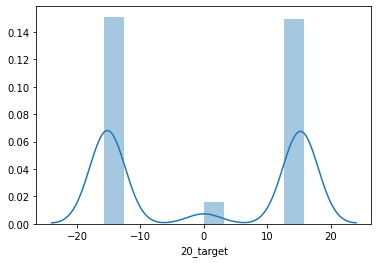

In [ ]:
sns.distplot(data_dummy["20_target"])
plt.show()

Burda inceledigimizde **50_target** degiskeni 3 farkli dagilim gostermektedir. 


1.   (-20 ve -40) arasinda sola dogru carpiklik oldugu icin -10-20 arasinda **LeftSkew** diye bir kategori olusturuyoruz.
2.   (-5 ve +5) arasinda ortada dagilim gosteren degerlere **Neutral** diye bir kategori olusturuyoruz.
3.   (+20 ve +40) arasinda degerlere **RightSkew** diye bir kategori olusturuyoruz.



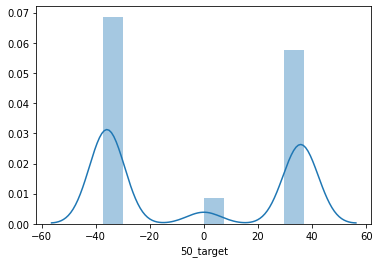

In [ ]:
sns.distplot(data_dummy["50_target"])
plt.show()

Burda inceledigimizde **90_target** degiskeni 3 farkli dagilim gostermektedir. 


1.   (-20 ve -40) arasinda sola dogru carpiklik oldugu icin -10-20 arasinda **LeftSkew** diye bir kategori olusturuyoruz.
2.   (-5 ve +5) arasinda ortada dagilim gosteren degerlere **Neutral** diye bir kategori olusturuyoruz.
3.   (+20 ve +40) arasinda degerlere **RightSkew** diye bir kategori olusturuyoruz.



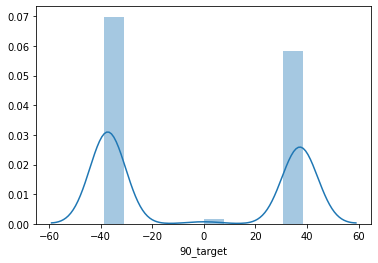

In [ ]:
sns.distplot(data_dummy["90_target"])
plt.show()

In [ ]:
leftDist = data_dummy.loc[:,:][(data_dummy["90_target"]>-40) & (data_dummy["90_target"]< -15)]
leftDist["90_target"] = 1 #"leftDist"

midDist = data_dummy.loc[:,:][(data_dummy["90_target"]> -5) & (data_dummy["90_target"]< 5)]
midDist["90_target"] = 2 #"midDist"

rightDist = data_dummy.loc[:,:][(data_dummy["90_target"]> 15) & (data_dummy["90_target"]< 40)]
rightDist["90_target"] = 3 #"rightDist"

data_categoric = pd.concat([leftDist, midDist, rightDist])
data_categoric = data_categoric.drop(["20_target", "50_target"], axis=1)
data_categoric.groupby("90_target").count()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN,ind_109_RED
90_target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,...,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318,3318
2,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
3,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,...,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773


In [ ]:
data_categoric.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,ind_109_GREEN,ind_109_RED
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,1,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,1,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,1,1,0
5,45,41,100.0,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,12.066667,10.2175,14,28,13,2,88,0.004142,-0.005168,-0.000513,66.666667,100.720013,118.537982,148.532148,186.019179,201.931930,195.467854,188.316882,228.751455,228.992445,51.950719,2,48.452317,-4,-18,-30,-34,-38,-46,-56,...,-0.000013,-1.520563,97.720088,1.179276,-0.754895,98.654263,1.190550,98.911320,-0.000062,11.643836,-0.156614,20.155039,-0.000091,1.197691,-0.318200,0.0,0.0,0.0,0.0,0.0,0.0,-9.452202,-52.322491,0.600000,0.002414,0.004832,-0.004784,-66,-14,-37,0.005395,8.8,-78.1,-84,1.0,0.794403,0.730549,1,1,0
6,49,45,100.0,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,12.653333,10.4650,15,32,17,-5,88,0.004034,-0.005626,-0.000796,66.666667,79.057155,108.756733,129.342855,162.249935,187.603903,188.576619,184.097335,223.798458,229.258543,58.968851,2,46.135635,2,-12,-23,-29,-35,-41,-53,...,-0.000013,-1.520626,97.725248,1.179290,-0.754926,98.661691,1.190590,98.920090,-0.000062,11.564626,-0.156620,20.000000,-0.000091,1.197781,-0.318213,0.0,0.0,0.0,0.0,0.0,0.0,-13.250518,-50.991994,5.370845,0.005013,0.006961,-0.006891,-63,-5,-29,0.005749,12.8,-71.7,-84,1.0,0.854144,0.746727,1,1,0


### **2.4. Normalization (Min-Max)**

In [ ]:
data_minmax = normalization_minmax(data_categoric, "90_target")
data_minmax.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN,ind_109_RED,90_target
0,0.777778,0.748792,1.0,0.714286,0.642857,0.866807,0.978490,0.094075,0.308102,0.281404,0.205782,0.188641,0.684783,0.718563,0.744444,0.886435,0.485981,0.146513,0.718925,0.373539,1.0,0.751730,0.675775,0.629793,0.683324,0.710758,0.666667,0.666294,0.750682,0.776575,0.670118,0.4,0.793685,0.427083,0.416667,0.335484,0.351852,0.302469,0.225989,0.223958,...,0.981941,0.208449,0.964777,0.954795,0.749307,0.979346,0.960069,0.973230,0.960129,0.119035,0.944513,0.207037,0.851232,0.960232,0.748993,1.0,1.0,0.0,1.0,0.0,0.0,0.957211,0.168856,0.389967,0.596402,0.567600,0.432400,0.190114,0.438272,0.263682,0.580332,0.009581,0.437380,0.680851,1.0,0.615169,0.776441,1.0,0.0,3
1,0.811594,0.777778,1.0,0.642857,0.678571,0.887958,0.982269,0.082468,0.249144,0.290978,0.191058,0.193317,0.750000,0.736527,0.733333,0.889590,0.500000,0.141111,0.684934,0.348484,1.0,0.795790,0.649292,0.612805,0.676143,0.706529,0.667704,0.667155,0.748941,0.779653,0.684522,0.4,0.803729,0.416667,0.424242,0.335484,0.345679,0.290123,0.220339,0.213542,...,0.981941,0.208784,0.964379,0.954805,0.749413,0.978964,0.960102,0.972864,0.960129,0.118208,0.944537,0.205407,0.851232,0.960305,0.749100,1.0,1.0,0.0,1.0,0.0,0.0,0.986446,0.150164,0.418008,0.642734,0.446071,0.553929,0.178707,0.438272,0.263682,0.597408,0.003194,0.404624,0.654255,1.0,0.661517,0.751445,1.0,0.0,3
2,0.830918,0.811594,1.0,0.571429,0.714286,0.955717,0.993415,0.169212,0.195131,0.338555,0.217454,0.215100,0.771739,0.766467,0.755556,0.921136,0.607477,0.210692,0.632729,0.378814,1.0,0.947851,0.685305,0.645707,0.722561,0.742599,0.701302,0.694941,0.775328,0.809680,0.792344,0.2,0.864247,0.281250,0.303030,0.232258,0.240741,0.185185,0.129944,0.125000,...,0.981941,0.210127,0.962752,0.954816,0.749838,0.977335,0.960134,0.971258,0.960129,0.117393,0.944631,0.203802,0.851232,0.960377,0.749526,1.0,1.0,0.0,1.0,0.0,0.0,0.998839,0.110144,0.374281,0.656060,0.501860,0.498140,0.106464,0.351852,0.189055,0.593840,0.000355,0.231214,0.542553,1.0,0.747204,0.785973,1.0,0.0,1
3,0.850242,0.830918,1.0,0.500000,0.750000,0.934936,0.990142,0.216249,0.210727,0.365535,0.235231,0.229927,0.782609,0.796407,0.788889,0.895899,0.593458,0.219009,0.589894,0.360541,1.0,0.802160,0.676951,0.622978,0.709621,0.736556,0.702886,0.698169,0.776313,0.816711,0.801127,0.2,0.864168,0.427083,0.363636,0.277419,0.277778,0.216049,0.169492,0.151042,...,0.981941,0.210016,0.962899,0.954827,0.749803,0.977505,0.960167,0.971440,0.960129,0.116589,0.944623,0.202222,0.851232,0.960450,0.749490,1.0,1.0,0.0,1.0,0.0,0.0,0.905478,0.120431,0.568293,0.683657,0.562419,0.437581,0.121673,0.413580,0.228856,0.619234,0.031228,0.247592,0.553191,1.0,0.794403,0.824224,1.0,0.0,1
4,0.869565,0.850242,1.0,0.428571,0.785714,0.928513,0.989106,0.175932,0.225561,0.384682,0.251033,0.241218,0.793478,0.820359,0.833333,0.873817,0.593458,0.213211,0.553741,0.333884,1.0,0.737171,0.662240,0.600887,0.681214,0.722331,0.695813,0.694067,0.770914,0.817055,0.841044,0.2,0.845621,0.489583,0.409091,0.322581,0.308642,0.234568,0.197740,0.166667,...,0.981941,0.209983,0.962950,0.954838,0.749793,0.977579,0.960199,0.971527,0.960129,0.115796,0.944621,0.200667,0.851232,0.960523,0.749480,1.0,1.0,0.0,1.0,0.0,0.0,0.867495,0.125848,0.603964,0.766975,0.573148,0.426852,0.133080,0.469136,0.268657,0.626743,0.045422,0.309249,0.553191,1.0,0.854144,0.844833,1.0,0.0,1


### **2.5. Without Normalization**

In [ ]:
data_without_norm = data_categoric
data_without_norm.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,ind_109_GREEN,ind_109_RED
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,1,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,1,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,1,1,0
5,45,41,100.0,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,12.066667,10.2175,14,28,13,2,88,0.004142,-0.005168,-0.000513,66.666667,100.720013,118.537982,148.532148,186.019179,201.931930,195.467854,188.316882,228.751455,228.992445,51.950719,2,48.452317,-4,-18,-30,-34,-38,-46,-56,...,-0.000013,-1.520563,97.720088,1.179276,-0.754895,98.654263,1.190550,98.911320,-0.000062,11.643836,-0.156614,20.155039,-0.000091,1.197691,-0.318200,0.0,0.0,0.0,0.0,0.0,0.0,-9.452202,-52.322491,0.600000,0.002414,0.004832,-0.004784,-66,-14,-37,0.005395,8.8,-78.1,-84,1.0,0.794403,0.730549,1,1,0
6,49,45,100.0,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,12.653333,10.4650,15,32,17,-5,88,0.004034,-0.005626,-0.000796,66.666667,79.057155,108.756733,129.342855,162.249935,187.603903,188.576619,184.097335,223.798458,229.258543,58.968851,2,46.135635,2,-12,-23,-29,-35,-41,-53,...,-0.000013,-1.520626,97.725248,1.179290,-0.754926,98.661691,1.190590,98.920090,-0.000062,11.564626,-0.156620,20.000000,-0.000091,1.197781,-0.318213,0.0,0.0,0.0,0.0,0.0,0.0,-13.250518,-50.991994,5.370845,0.005013,0.006961,-0.006891,-63,-5,-29,0.005749,12.8,-71.7,-84,1.0,0.854144,0.746727,1,1,0


# **3. Feature Selection**

### **3.1. Principal Component Analysis**

In [ ]:
data_pca = featureselection_pca(data_minmax, "90_target", 0.9)
data_pca.head()

pca sonrası değişken sayısı:  19


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,90_target
0,-2.088737,0.072149,-0.135119,0.317724,-0.062843,0.280218,0.375154,-0.605005,0.232259,0.319001,-0.261715,0.788576,0.268427,-0.474156,-0.203423,0.089478,-0.246062,0.361119,-0.002372,3
1,-2.203106,0.090405,-0.066407,0.261085,-0.005468,0.251994,0.388037,-0.587139,0.199041,0.326763,-0.170757,0.828007,0.252351,-0.480077,-0.183597,0.063912,-0.240448,0.327890,0.011579,3
2,-2.528751,0.126773,0.046819,0.234280,0.029756,0.354077,0.427985,-0.621044,0.236388,0.310995,-0.077167,0.849048,0.119429,-0.508945,-0.242452,0.143253,-0.363971,0.486983,-0.044026,1
3,-2.441075,-0.021457,0.129813,0.226355,-0.041915,0.255516,0.444542,-0.604685,0.225015,0.263539,-0.119784,0.695764,0.219255,-0.533952,-0.268072,0.160373,-0.411566,0.459309,-0.035494,1
4,-2.406857,-0.110602,0.194157,0.207484,-0.064106,0.194622,0.454288,-0.586721,0.208578,0.228609,-0.126674,0.614212,0.276129,-0.541849,-0.236443,0.163296,-0.432941,0.430018,-0.027181,1


### **3.2. Correlation based Feature Selection**

In [ ]:
data_corr = layer1(data_minmax, "90_target", 0.6)
data_corr.head()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_26,ind_27,ind_28,ind_40,ind_42,ind_88,ind_164,ind_172,ind_176,ind_217,ind_225,ind_228,ind_237,ind_239,ind_241,ind_309,ind_310,ind_311,ind_315,ind_316,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_347,ind_349,ind_351,ind_416,90_target
0,0.777778,1.0,0.714286,0.094075,0.188641,0.718925,0.373539,1.0,0.4,0.427083,0.603923,0.525945,0.689852,0.388653,0.2,0.241401,0.956728,0.083377,0.084932,0.950941,0.981941,0.208449,0.964777,0.749307,0.979346,0.960129,0.119035,0.944513,0.207037,0.851232,0.960232,0.748993,1.0,0.0,1.0,0.0,0.437380,3
1,0.811594,1.0,0.642857,0.082468,0.193317,0.684934,0.348484,1.0,0.4,0.416667,0.596647,0.581244,0.684686,0.423719,0.2,0.241299,0.956600,0.076963,0.084932,0.950367,0.981941,0.208784,0.964379,0.749413,0.978964,0.960129,0.118208,0.944537,0.205407,0.851232,0.960305,0.749100,1.0,0.0,1.0,0.0,0.404624,3
2,0.830918,1.0,0.571429,0.169212,0.215100,0.632729,0.378814,1.0,0.2,0.281250,0.681778,0.569585,0.665512,0.412208,0.4,0.240889,0.956473,0.071466,0.084932,0.948581,0.981941,0.210127,0.962752,0.749838,0.977335,0.960129,0.117393,0.944631,0.203802,0.851232,0.960377,0.749526,1.0,0.0,1.0,0.0,0.231214,1
3,0.850242,1.0,0.500000,0.216249,0.229927,0.589894,0.360541,1.0,0.2,0.427083,0.615864,0.700435,0.675678,0.499365,0.4,0.240923,0.956345,0.066701,0.084932,0.948543,0.981941,0.210016,0.962899,0.749803,0.977505,0.960129,0.116589,0.944623,0.202222,0.851232,0.960450,0.749490,1.0,0.0,1.0,0.0,0.247592,1
4,0.869565,1.0,0.428571,0.175932,0.241218,0.553741,0.333884,1.0,0.2,0.489583,0.597704,0.772446,0.640111,0.555187,0.4,0.240933,0.956218,0.062532,0.084932,0.948410,0.981941,0.209983,0.962950,0.749793,0.977579,0.960129,0.115796,0.944621,0.200667,0.851232,0.960523,0.749480,1.0,0.0,1.0,0.0,0.309249,1


# **4. Visualization**

### **4.1. Histogram (Distribution)**

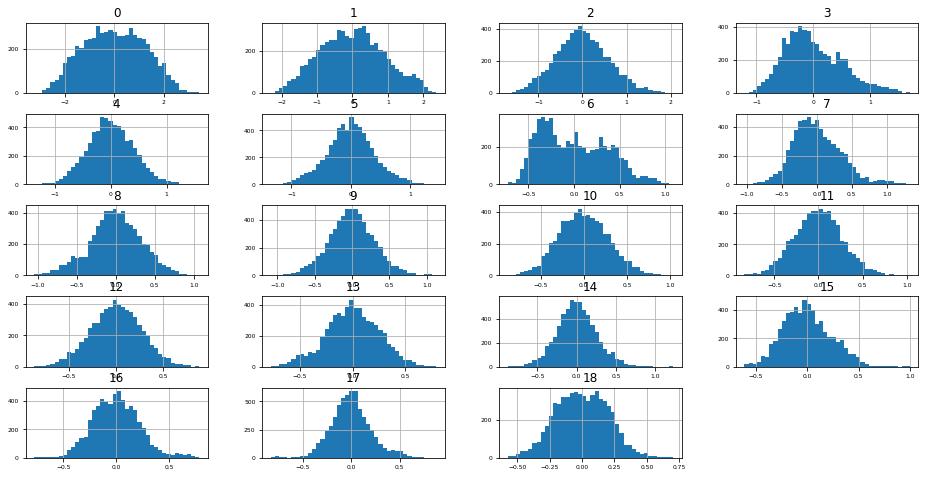

In [ ]:
histogram(data_pca, figsize=(16,8))

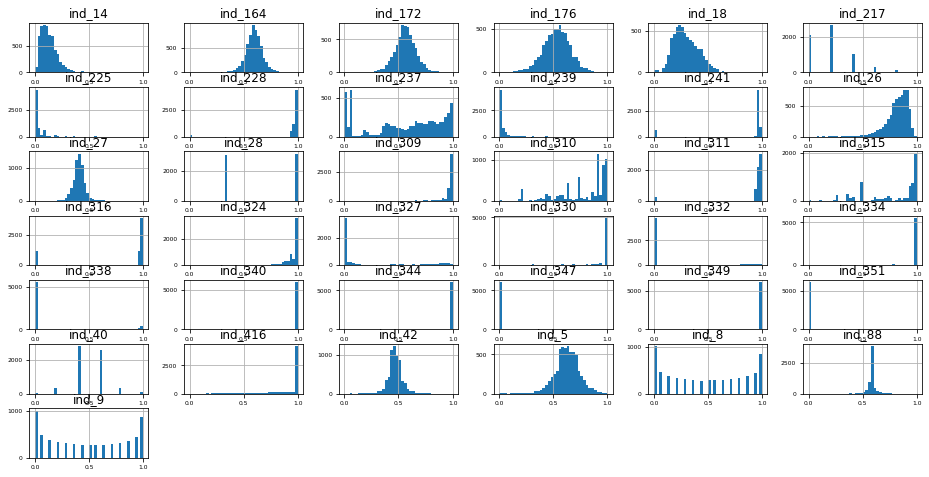

In [ ]:
histogram(data_corr, figsize=(16,8))

### **4.2. Correlation HeatMap**

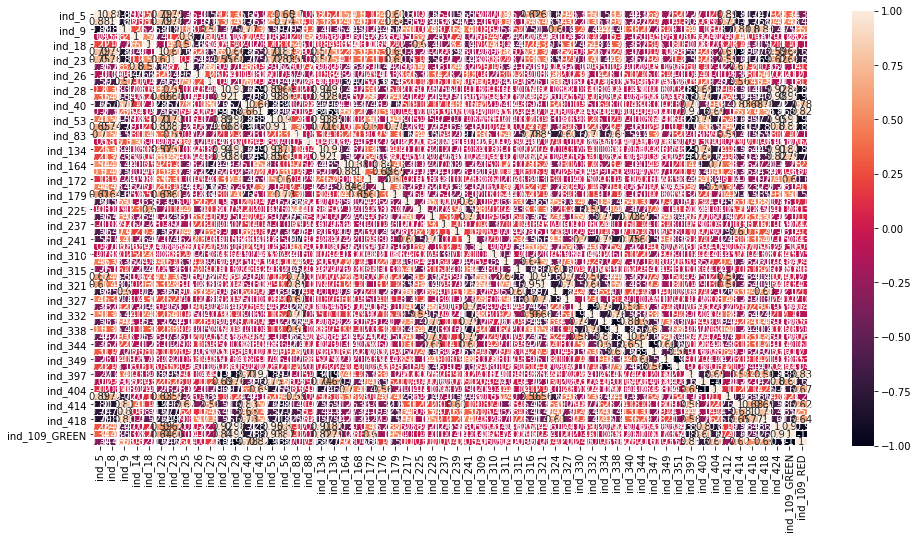

In [ ]:
heatmap(data_corr.corr())

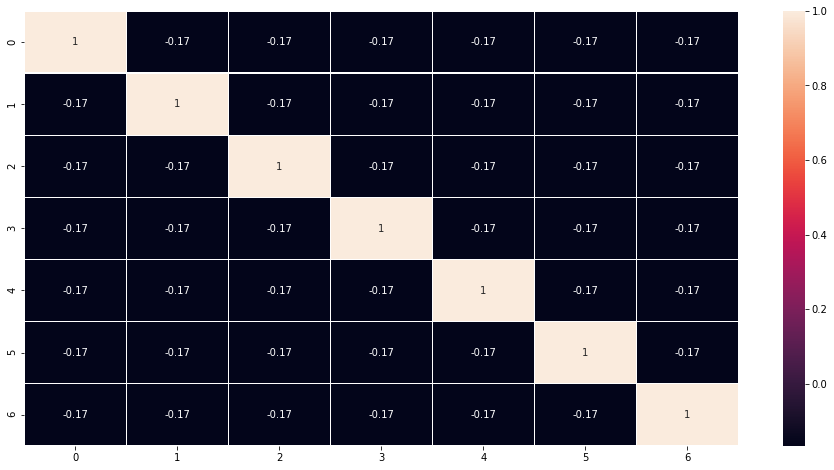

In [ ]:
heatmap(data_pca.corr())

# **Modelling**
- Gaussian Naive Bayes
- Multinomial Naive Bayes 
- Bernoulli Naive Bayes

## 4.1. Gaussian Naive Bayes

### 4.1.1. PCA based FS

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca, "90_target")
y_pred, gnb_model = GaussianNaiveBayes(xtrain, ytrain, xtest)
evaluation_classification(ytest, y_pred)
print("\n",classification_report(ytest, y_pred))

(4625, 19) (1542, 19) (4625,) (1542,)
accuracy :  0.52853 
precision:  0.56333 
recall   :  0.60285 
f1-score :  0.58242

               precision    recall  f1-score   support

           1       0.56      0.60      0.58       841
           3       0.48      0.44      0.46       701

    accuracy                           0.53      1542
   macro avg       0.52      0.52      0.52      1542
weighted avg       0.53      0.53      0.53      1542



### 4.1.2. Correlation based FS

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr, "90_target")
y_pred, gnb_model = GaussianNaiveBayes(xtrain, ytrain, xtest)
evaluation_classification(ytest, y_pred)
print("\n",classification_report(ytest, y_pred, ))

(4625, 37) (1542, 37) (4625,) (1542,)
accuracy :  0.43256 
precision:  0.43256 
recall   :  0.43256 
f1-score :  0.43256

               precision    recall  f1-score   support

           1       0.45      0.09      0.15       841
           2       0.00      0.00      0.00         0
           3       0.44      0.85      0.58       701

    accuracy                           0.43      1542
   macro avg       0.30      0.31      0.24      1542
weighted avg       0.45      0.43      0.34      1542



## 4.2. Multinomial Naive Bayes

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr, "90_target")
y_pred, gnb_model = MultinomialNaiveBayes(xtrain, ytrain, xtest)
evaluation_classification(ytest, y_pred)
print("\n",classification_report(ytest, y_pred, ))

(4625, 37) (1542, 37) (4625,) (1542,)
accuracy :  0.53956 
precision:  0.54743 
recall   :  0.89893 
f1-score :  0.68047

               precision    recall  f1-score   support

           1       0.55      0.90      0.68       841
           3       0.47      0.11      0.18       701

    accuracy                           0.54      1542
   macro avg       0.51      0.50      0.43      1542
weighted avg       0.51      0.54      0.45      1542



## 4.3. Bernoulli Naive Bayes

### 4.3.1. PCA based FS

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca, "90_target")
y_pred, bnb_model = BernoulliNaiveBayes(xtrain, ytrain, xtest)
evaluation_classification(ytest, y_pred)
print("\n",classification_report(ytest, y_pred, ))

(4625, 19) (1542, 19) (4625,) (1542,)
accuracy :  0.53567 
precision:  0.53567 
recall   :  0.53567 
f1-score :  0.53567

               precision    recall  f1-score   support

           1       0.57      0.63      0.60       841
           3       0.49      0.43      0.45       701

    accuracy                           0.54      1542
   macro avg       0.53      0.53      0.53      1542
weighted avg       0.53      0.54      0.53      1542



### 4.3.2. Correlation based FS

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr, "90_target")
y_pred, bnb_model = BernoulliNaiveBayes(xtrain, ytrain, xtest)
evaluation_classification(ytest, y_pred)
print("\n",classification_report(ytest, y_pred, ))

(4625, 37) (1542, 37) (4625,) (1542,)
accuracy :  0.4585 
precision:  0.4585 
recall   :  0.4585 
f1-score :  0.4585

               precision    recall  f1-score   support

           1       0.50      0.43      0.47       841
           3       0.42      0.49      0.45       701

    accuracy                           0.46      1542
   macro avg       0.46      0.46      0.46      1542
weighted avg       0.47      0.46      0.46      1542



# **5. Model Tuning**

## 5.1. Gaussian Naive Bayes

In [ ]:
start = timeit.default_timer()

bnb_params = {"alpha": [0.1, 0.2,0.3,0.5,0.7,0.8,1.0]}

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca, "90_target")
ytest, y_pred, gnb_model, best_params = BernoulliNBTuning(xtrain,ytrain,xtest,ytest, bnb_params)
evaluation_metrics(ytest, y_pred)
print(best_params)

stop = timeit.default_timer()
print('\nPassed Time: ', stop - start)  

(4625, 19) (1542, 19) (4625,) (1542,)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


accuracy :  0.53567 
precision:  0.56713 
recall   :  0.62782 
f1-score :  0.59594
{'alpha': 0.1}

Passed Time:  0.5059237980003672


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished


## 5.2. Multinomial Naive Bayes

In [ ]:
start = timeit.default_timer()

bnb_params = {"alpha": [0.1, 0.2,0.3,0.5,0.7,0.8,1.0]}

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr, "90_target")
ytest, y_pred, mnb_model, best_params = MultinomialNBTuning(xtrain,ytrain,xtest,ytest, bnb_params)
evaluation_metrics(ytest, y_pred)
print(best_params)

stop = timeit.default_timer()
print('\nPassed Time: ', stop - start)  

(4625, 37) (1542, 37) (4625,) (1542,)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


accuracy :  0.53956 
precision:  0.54743 
recall   :  0.89893 
f1-score :  0.68047
{'alpha': 1.0}

Passed Time:  0.5452777869995771


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished


## 5.3. Bernoulli Naive Bayes

In [ ]:
start = timeit.default_timer()

bnb_params = {"alpha": [0.1, 0.2,0.3,0.5,0.7,0.8,1.0]}

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca, "90_target")
ytest, y_pred, bnb_model, best_params = BernoulliNBTuning(xtrain,ytrain,xtest,ytest, bnb_params)
evaluation_metrics(ytest, y_pred)
print(best_params)

stop = timeit.default_timer()
print('\nPassed Time: ', stop - start)  

(4625, 19) (1542, 19) (4625,) (1542,)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


accuracy :  0.53567 
precision:  0.56713 
recall   :  0.62782 
f1-score :  0.59594
{'alpha': 0.1}

Passed Time:  0.52027439000085


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
